# Semantic Segmentation

For semantic segmentation, we 'll plot the pixel-wise segmentation masks over the images to see how objects are labeled at the pixel level.

# Defining IOU (Intersection over Union) for a segmentation task:

IOU is a metric used to evaluate the overlap between predicted and ground truth regions.
For semantic segmentation, IOU  is computed as the intersection area between the predicted segmentation mask and the ground truth mask divided by the union area of both masks.
It measures how well the predicted segmentation aligns with the ground truth segmentation at the pixel level.

# Difference between IOU for segmentation and object detection:

In object detection, IOU measures the overlap between predicted bounding boxes and ground truth bounding boxes.
It is computed as the intersection area between the two bounding boxes divided by the union area of both bounding boxes.
In semantic segmentation, IOU measures the overlap between pixel-wise segmentation masks rather than bounding boxes.

# Solution

# Imports:
The necessary libraries/modules like os, cv2, numpy, matplotlib, and PIL are imported.



# Function Definitions:

display_image(image_path): Displays an image.

plot_annotations(image_path, annotation_path): Plots bounding box annotations on an image.

generate_random_mask(true_mask): Generates a random mask based on the provided true mask.

calculate_iou(true_mask, predicted_mask): Calculates the Intersection over Union (IOU) score between a true mask and a predicted mask.

erode_and_dilate(mask): Performs erosion and dilation operations on a mask.


# Main Function (main())

Loads a random masked image file.

Finds corresponding JPEG image and annotation file.

Plots annotations on the original image and displays it.

Displays the masked image with annotations.

Loads the true mask from the masked image.

Generates a random mask based on the true mask.

Applies erosion and dilation to the random mask.

Displays the true mask and the predicted mask.

Calculates the IOU score between the true mask and the  predicted mask.


# Importing Libraries

In [192]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from xml.etree import ElementTree as ET

# File Paths

In [193]:
main_directory = r'C:\segmentation\VOCdevkit\VOC2012'
images_directory = os.path.join(main_directory, 'JPEGImages')
annotations_directory = os.path.join(main_directory, 'Annotations')
masked_images_directory = os.path.join(main_directory, 'SegmentationClass')

# Function to display an image

In [194]:
def display_image(image_path):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Function to plot annotations

In [195]:
def plot_annotations(image_path, annotation_path):
    image = Image.open(image_path)
    plt.imshow(image)
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        plt.rectangle = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                      edgecolor='r', facecolor='none')
        plt.annotate(obj_name, (xmin, ymin), color='r')
        plt.gca().add_patch(plt.rectangle)
    plt.axis('off')
    plt.show()

In [240]:
def generate_random_mask(true_mask):

    # Get unique classes excluding background class (0)
    unique_classes = np.unique(true_mask)
    unique_classes = unique_classes[unique_classes != 0]

    # Randomly select a class from the remaining classes
    random_class = random.choice(unique_classes)
    
    # Create a binary mask based on the randomly selected class
    random_mask = np.where(true_mask == random_class, 1, 0).astype(np.uint8)
    
    return random_mask



# Function to calculate Intersection over Union (IOU)

In [241]:
def calculate_iou(true_mask, predicted_mask):
    intersection = np.logical_and(true_mask, predicted_mask)
    union = np.logical_or(true_mask, predicted_mask)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

In [242]:
def erode_and_dilate(mask):
    # Erosion
    kernel = np.ones((5,5),np.uint8)
    eroded_mask = cv2.erode(mask, kernel, iterations = 1)

    # Dilation
    dilated_mask = cv2.dilate(eroded_mask, kernel, iterations = 1) 

    return dilated_mask

In [285]:
def semanticSegmentation():
    # Load masked image files
    masked_image_files = os.listdir(masked_images_directory)
    random_masked_image_file = random.choice(masked_image_files)
    image_id = os.path.splitext(random_masked_image_file)[0]
    masked_image_path = os.path.join(masked_images_directory, random_masked_image_file)

    # Find corresponding JPEG image and annotation file
    image_file = image_id + '.jpg'
    annotation_file = image_id + '.xml'
    image_path = os.path.join(images_directory, image_file)
    annotation_path = os.path.join(annotations_directory, annotation_file)

    plot_annotations(image_path, annotation_path)
    display_image(masked_image_path)
    plot_annotations(masked_image_path, annotation_path)
    

    # Load true mask
    true_mask = np.array(Image.open(masked_image_path))

    # Generate random mask
    random_mask = generate_random_mask(true_mask)
    


    # Apply erosion and dilation to the random mask
    predicted_mask = erode_and_dilate(random_mask)
    # Display masks
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 3, 1)
    plt.title('True Mask')
    plt.imshow(true_mask, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title('Predicted Mask')
    plt.imshow(predicted_mask, cmap='gray')
    plt.axis('off')
    plt.show()
     # Calculate IOU for the dilated mask
    iou_score = calculate_iou(true_mask,predicted_mask)
    return iou_score





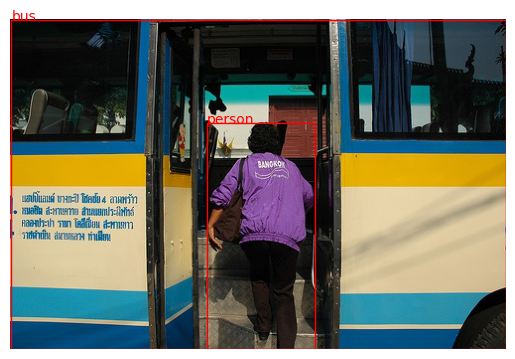

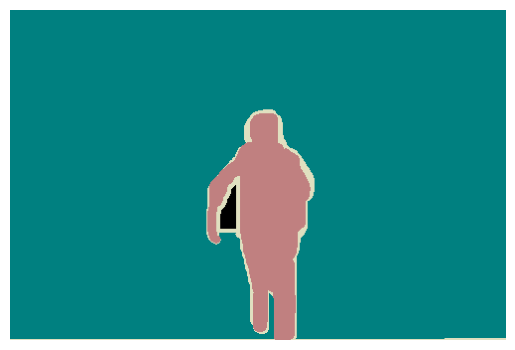

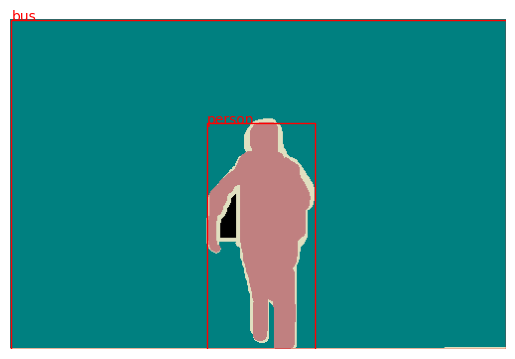

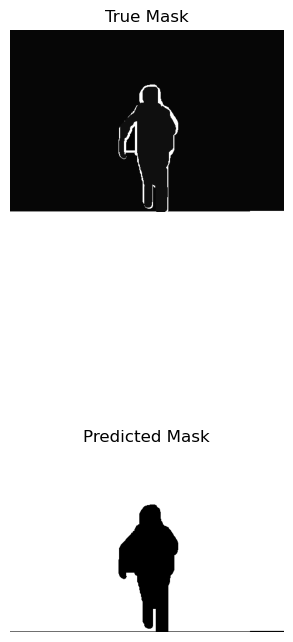

In [286]:
iou_score = semanticSegmentation()

In [287]:
print("Iou Score:",iou_score)

Iou Score: 0.909567867770188
